In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
np.random.seed(7)

# use only CPU, since GPU didn't run on my system
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""
print(os.getcwd())

/home/alexander/PycharmProjects/MachineLearningUZH/DeepLearningExerciseCorrection


In [3]:
# import dataset and transform it to a numpy array
dataset = pd.read_pickle('fullDataFrame')
dataset = dataset.replace(r'\\n',' ', regex=True)
dataset['label'] = dataset['label'].astype(int)
display(dataset)
dataset = dataset.values

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,filename,label
1,110.0,22.0,114.0,40.0,108.0,38.0,88.0,50.0,86.0,30.0,...,110.0,18.0,114.0,20.0,NaN,NaN,124.0,24.0,7_20-42-03.096,2
2,142.0,8.0,148.0,20.0,142.0,18.0,124.0,22.0,124.0,12.0,...,140.0,6.0,146.0,6.0,NaN,NaN,154.0,8.0,56_20-35-04.885,2
3,134.0,10.0,146.0,26.0,148.0,26.0,142.0,56.0,130.0,68.0,...,NaN,NaN,136.0,8.0,NaN,NaN,144.0,10.0,42_18-16-56.450,2
4,188.0,26.0,178.0,50.0,174.0,50.0,214.0,62.0,216.0,30.0,...,180.0,22.0,188.0,20.0,168.0,28.0,NaN,NaN,75_22-20-57.517,1
5,86.0,22.0,92.0,38.0,96.0,38.0,72.0,40.0,68.0,28.0,...,NaN,NaN,88.0,20.0,NaN,NaN,94.0,24.0,66_11-27-03.373,1
6,134.0,20.0,138.0,40.0,136.0,38.0,106.0,42.0,NaN,NaN,...,132.0,16.0,138.0,18.0,NaN,NaN,146.0,24.0,144_14-58-29.277,2
7,NaN,NaN,110.0,18.0,114.0,18.0,78.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,114.0,4.0,35_13-36-36.189,1
8,90.0,22.0,94.0,38.0,98.0,38.0,74.0,38.0,72.0,26.0,...,NaN,NaN,92.0,20.0,NaN,NaN,96.0,24.0,66_11-27-06.395,0
9,88.0,6.0,106.0,16.0,110.0,14.0,76.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35_13-36-46.406,1
10,248.0,56.0,230.0,70.0,232.0,68.0,266.0,66.0,262.0,46.0,...,246.0,52.0,NaN,NaN,236.0,52.0,NaN,NaN,58_17-00-48.582,1


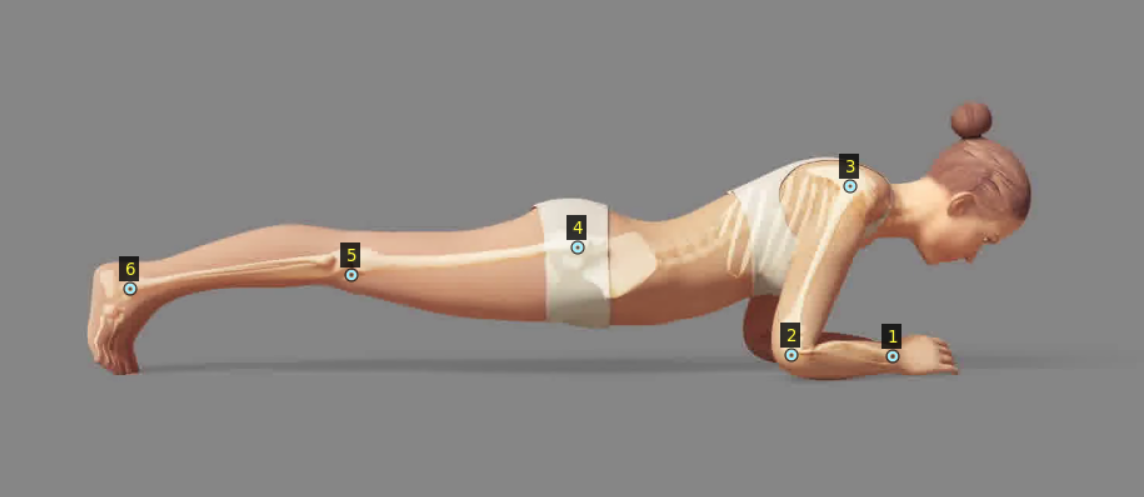

In [4]:
# the 36 features in the dataFrame above represent the 18 human keypoints' 
# x and y values as shown in following picture
Image("images/PlankReferenceLabeling.png")

# the last column in the dataFrame above represents the labels 0 = back too low, 1 = correct, 2 = back too high

In [5]:
# split dataset in X (input) and Y (labels)
X = dataset[:, 0:36]
Y = dataset[:, 37]
Y = Y.astype(int)

In [6]:
# Feature Scaling (all values between 0.0 and 1.0) and NaN to 0
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.nan_to_num(X)

In [7]:
# one hot encoding of labels
onehot_encoder = OneHotEncoder(sparse=False)
Y = Y.reshape(len(Y), 1)
Y = onehot_encoder.fit_transform(Y)

/home/alexander/anaconda3/envs/MachineLearningUZH/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
# split in train / test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=False)

In [9]:
# create model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='softmax'))  # we use Softmax, so the outputs represent accuracies that add up to 1

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=10)

# evaluate model
eval_model=model.evaluate(X_train, y_train)
eval_model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4637/4637 [==============================] - 0s 79us/step - loss: 0.8599 - acc: 0.6077
Epoch 2/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.7139 - acc: 0.6970
Epoch 3/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.6232 - acc: 0.7498
Epoch 4/20
4637/4637 [==============================] - 0s 50us/step - loss: 0.5752 - acc: 0.7721
Epoch 5/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.5369 - acc: 0.7891
Epoch 6/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.5044 - acc: 0.8016
Epoch 7/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.4847 - acc: 0.8091
Epoch 8/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.4717 - acc: 0.8154
Epoch 9/20
4637/4637 [==============================] - 0s 49us/step - loss: 0.4523 - acc: 0.824

[0.37757616933754146, 0.8527064911759257]

In [10]:
# transform predictions to 0 and 1 (instead of probabilities)
y_pred=model.predict(X_test)
y_pred =(y_pred > 0.5)

[[170  49   6]
 [ 24 889 217]
 [  3  98 829]]


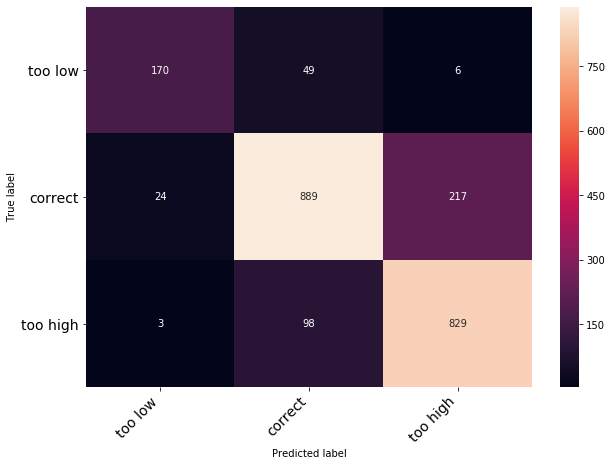

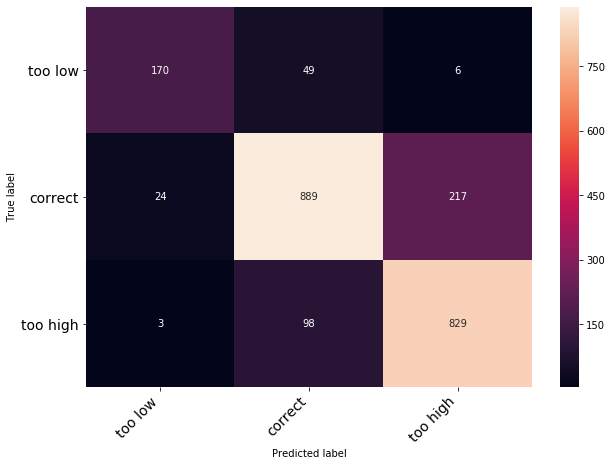

In [11]:
# define confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

# print a prettier consufion matrix in heatmap style
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

print_confusion_matrix(cm, ['too low', 'correct', 'too high'])